In [2]:
# coding: utf-8
__author__ = "Nicholas Metherall"
__copyright__ = "Copyright 2025, The Pacific Community (SPC)"
__license__ = "CreativeCommons"
__version__ = "0.1"
__email__ = "nicholasm@spc.int"
__status__ = "Development"

In [3]:
import geopandas as gpd
from shapely.ops import unary_union

<Axes: >

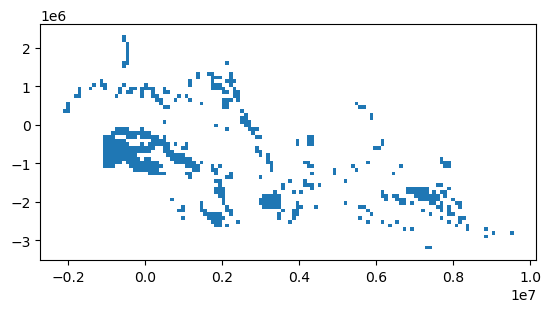

In [4]:
pacific_grid = gpd.read_file("pacific_grid.gpkg")
pacific_grid.plot()

In [5]:
pacific_grid

,level_0,level_1,GID_0,COUNTRY,geometry
0,107,8,PYF,French Polynesia,"POLYGON ((7272000 -3232000, 7272000 -3136000, ..."
1,108,8,PYF,French Polynesia,"POLYGON ((7368000 -3232000, 7368000 -3136000, ..."
2,123,11,PCN,Pitcairn Islands,"POLYGON ((8808000 -2944000, 8808000 -2848000, ..."
3,125,12,PCN,Pitcairn Islands,"POLYGON ((9000000 -2848000, 9000000 -2752000, ..."
4,130,12,PCN,Pitcairn Islands,"POLYGON ((9480000 -2848000, 9480000 -2752000, ..."
...,...,...,...,...,...
517,26,61,MNP,Northern Mariana Islands,"POLYGON ((-504000 1856000, -504000 1952000, -4..."
518,26,62,MNP,Northern Mariana Islands,"POLYGON ((-504000 1952000, -504000 2048000, -4..."
519,26,63,MNP,Northern Mariana Islands,"POLYGON ((-504000 2048000, -504000 2144000, -4..."
520,25,64,MNP,Northern Mariana Islands,"POLYGON ((-600000 2144000, -600000 2240000, -5..."


In [6]:
unique_values = pacific_grid['COUNTRY'].unique()
print(unique_values)

['French Polynesia' 'Pitcairn Islands' 'New Caledonia' 'Tonga'
 'Cook Islands' 'Fiji' 'Vanuatu' 'Niue' 'Kiribati' 'Wallis and Futuna'
 'American Samoa' 'Samoa' 'Solomon Islands' 'Papua New Guinea' 'Tuvalu'
 'Tokelau' 'Nauru' 'Micronesia' 'Palau' 'Marshall Islands' 'Guam'
 'Northern Mariana Islands']


<Axes: >

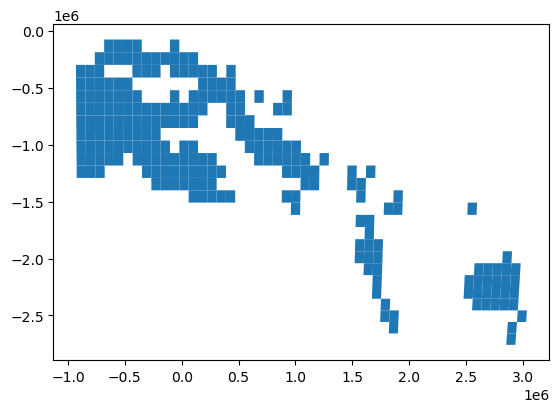

In [7]:
subset_countries = ['Fiji', 'Vanuatu', 'Solomon Islands', 'Papua New Guinea']
macblue_grids = pacific_grid[pacific_grid['COUNTRY'].isin(subset_countries)]
macblue_grids = macblue_grids.to_crs("EPSG:8859")
macblue_grids.to_file("macblue.geojson")
macblue_grids.plot()

In [8]:
macblue_grids['index'] = range(1, len(macblue_grids) + 1)

In [9]:
macblue_grids

,level_0,level_1,GID_0,COUNTRY,geometry,index
31,67,16,FJI,Fiji,"POLYGON ((2853497.38 -2758834.497, 2860754.992...",1
42,54,17,VUT,Vanuatu,"POLYGON ((1820480.449 -2658691.923, 1824951.85...",2
43,67,17,FJI,Fiji,"POLYGON ((2860754.992 -2658691.923, 2867781.49...",3
54,53,18,VUT,Vanuatu,"POLYGON ((1744734.194 -2557719.247, 1748864.58...",4
55,54,18,VUT,Vanuatu,"POLYGON ((1824951.858 -2557719.247, 1829272.15...",5
...,...,...,...,...,...,...
403,23,40,PNG,Papua New Guinea,"POLYGON ((-681479.65 -185890.359, -681566.064 ...",225
404,24,40,PNG,Papua New Guinea,"POLYGON ((-598876.056 -185890.359, -598951.995...",226
405,25,40,PNG,Papua New Guinea,"POLYGON ((-516272.462 -185890.359, -516337.927...",227
406,26,40,PNG,Papua New Guinea,"POLYGON ((-433668.868 -185890.359, -433723.859...",228


In [10]:
macblue_grids['uuid'] = macblue_grids['GID_0']+macblue_grids['index'].astype(str)

In [11]:
macblue_grids

,level_0,level_1,GID_0,COUNTRY,geometry,index,uuid
31,67,16,FJI,Fiji,"POLYGON ((2853497.38 -2758834.497, 2860754.992...",1,FJI1
42,54,17,VUT,Vanuatu,"POLYGON ((1820480.449 -2658691.923, 1824951.85...",2,VUT2
43,67,17,FJI,Fiji,"POLYGON ((2860754.992 -2658691.923, 2867781.49...",3,FJI3
54,53,18,VUT,Vanuatu,"POLYGON ((1744734.194 -2557719.247, 1748864.58...",4,VUT4
55,54,18,VUT,Vanuatu,"POLYGON ((1824951.858 -2557719.247, 1829272.15...",5,VUT5
...,...,...,...,...,...,...,...
403,23,40,PNG,Papua New Guinea,"POLYGON ((-681479.65 -185890.359, -681566.064 ...",225,PNG225
404,24,40,PNG,Papua New Guinea,"POLYGON ((-598876.056 -185890.359, -598951.995...",226,PNG226
405,25,40,PNG,Papua New Guinea,"POLYGON ((-516272.462 -185890.359, -516337.927...",227,PNG227
406,26,40,PNG,Papua New Guinea,"POLYGON ((-433668.868 -185890.359, -433723.859...",228,PNG228


In [12]:
fiji = gpd.read_file('gadm/fiji.geojson').to_crs("EPSG:8859")
png = gpd.read_file('gadm/png.geojson').to_crs("EPSG:8859")
solomons = gpd.read_file('gadm/solomons.geojson').to_crs("EPSG:8859")
vanuatu = gpd.read_file('gadm/vanuatu.geojson').to_crs("EPSG:8859")

In [13]:
macblue_coastlines = [fiji, png, solomons, vanuatu]

In [14]:
# Flatten the list of GeoDataFrames into a list of geometries
all_geoms = [geom for gdf in macblue_coastlines for geom in gdf.geometry]
union_geom = unary_union(all_geoms)
union_gdf = gpd.GeoDataFrame(geometry=[union_geom], crs=macblue_grids.crs)

# Assume 'coastlines_gdf' is your GeoDataFrame with Polygon or MultiPolygon geometries
coastline_lines = union_gdf.copy()
coastline_lines['geometry'] = coastline_lines['geometry'].boundary

<Axes: >

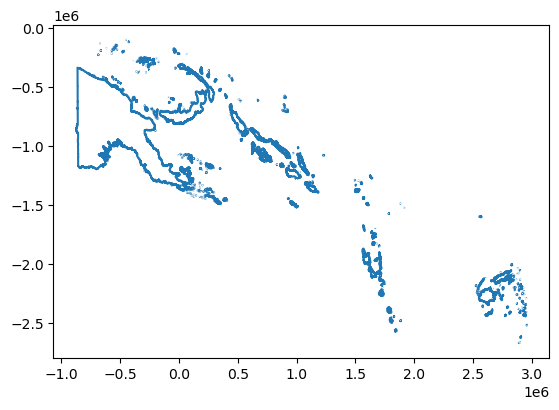

In [15]:
coastline_lines.to_file("coastline_lines.geojson")
coastline_lines.plot()

In [16]:
if 'level_0' in macblue_grids.columns:
    macblue_grids = macblue_grids.drop(columns=['level_0'])
if 'level_0' in coastline_lines.columns:
    coastline_lines = coastline_lines.drop(columns=['level_0'])

<Axes: >

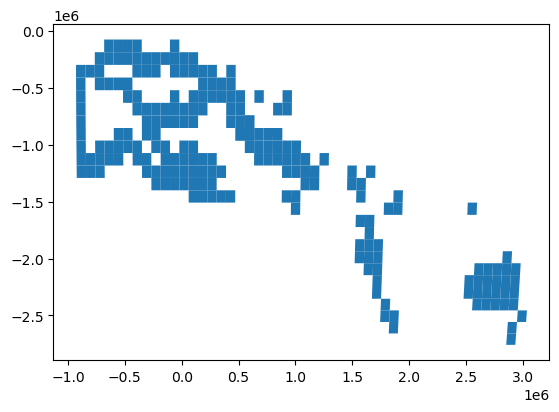

In [17]:
# Only keep grids that intersect with any coastline
subset = gpd.sjoin(macblue_grids, coastline_lines, how="inner", predicate="intersects")

coastal_macblue_grids = subset.drop_duplicates(subset='uuid')

coastal_macblue_grids.plot()

In [18]:
coastal_macblue_grids.to_file('coastal_macblue_grids.geojson')

In [19]:
coastal_macblue_grids

,level_1,GID_0,COUNTRY,geometry,index,uuid,index_right
31,16,FJI,Fiji,"POLYGON ((2853497.38 -2758834.497, 2860754.992...",1,FJI1,0
42,17,VUT,Vanuatu,"POLYGON ((1820480.449 -2658691.923, 1824951.85...",2,VUT2,0
43,17,FJI,Fiji,"POLYGON ((2860754.992 -2658691.923, 2867781.49...",3,FJI3,0
54,18,VUT,Vanuatu,"POLYGON ((1744734.194 -2557719.247, 1748864.58...",4,VUT4,0
55,18,VUT,Vanuatu,"POLYGON ((1824951.858 -2557719.247, 1829272.15...",5,VUT5,0
...,...,...,...,...,...,...,...
403,40,PNG,Papua New Guinea,"POLYGON ((-681479.65 -185890.359, -681566.064 ...",225,PNG225,0
404,40,PNG,Papua New Guinea,"POLYGON ((-598876.056 -185890.359, -598951.995...",226,PNG226,0
405,40,PNG,Papua New Guinea,"POLYGON ((-516272.462 -185890.359, -516337.927...",227,PNG227,0
406,40,PNG,Papua New Guinea,"POLYGON ((-433668.868 -185890.359, -433723.859...",228,PNG228,0
